In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Voting classifier

<img src=http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier_files/majority_voting.png width=400/>

</br>

**Метод простого голосования**
* $c_1, c_2, ..., c_m$ - обученные алгоритмы  
* Классификация: относим $x$ к классу, за который проголосовало *большинство* из $c_1(x), c_2(x), ..., c_m(x)$
* Регрессия: ответом является среднее значение $c_1(x), c_2(x), ..., c_m(x)$



In [ ]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=1000, centers=[[-2, 1], [0, -2]], cluster_std=1)
X2, y2 = make_blobs(n_samples=500, centers=[[3, 0], [1, 3]], cluster_std=1)
X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])

In [ ]:
X

array([[-0.18644993,  0.46736241],
       [-2.29457952,  1.52192409],
       [ 0.43557184, -0.44986649],
       ...,
       [ 2.90788388,  0.65809377],
       [ 0.8135728 ,  1.62290609],
       [ 1.16205773,  3.9652873 ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys


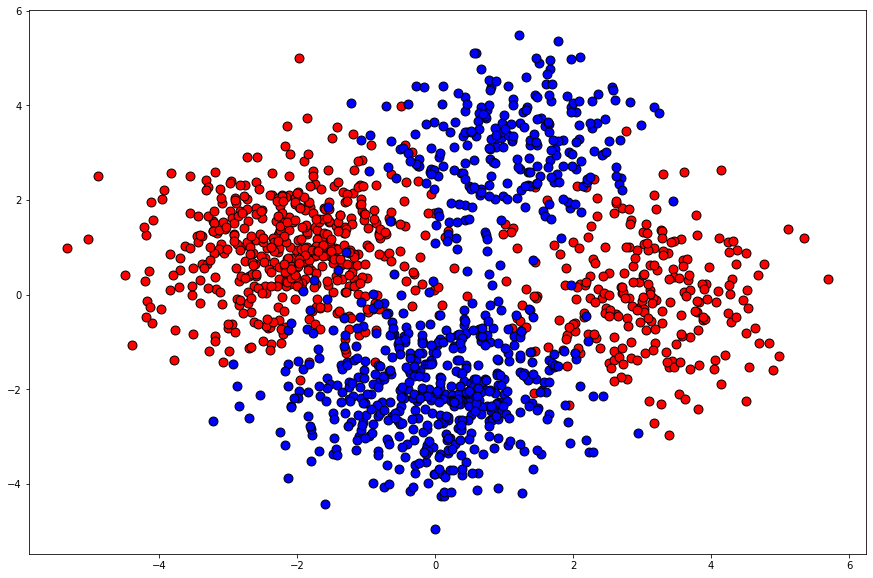

In [ ]:
def plot_blobs(x, y):

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    reds = y == 0
    blues = y == 1
    
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=80, edgecolor="K")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=80, edgecolor="K")

    plt.show()

plot_blobs(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

((1050, 2), (450, 2))

## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[137,  77],
       [ 89, 147]])

In [ ]:
def plot_confusion(model, X, y, class_names=('above average', 'below average')):
    ConfusionMatrixDisplay.from_estimator(model, X, y, cmap=plt.cm.Blues, display_labels=class_names, values_format='d')
plot_confusion(lr, X_train, y_train)
plot_confusion(lr, X_test, y_test)

NameError: ignored

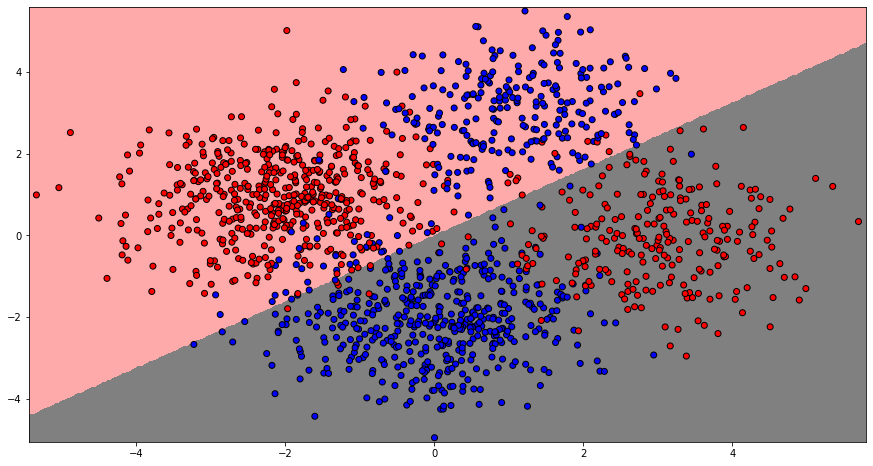

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def plot_blob_classes(model, X, y):
    plt.figure(figsize=(15,8))

    eps = 0.1
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                         np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

    colors = ("red", "blue")
    colored_y = np.zeros(y.size, dtype=str)

    for i, cl in enumerate([0,1]):
        colored_y[y == cl] = str(colors[i])

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', 'grey'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='K')
    plt.show()

plot_blob_classes(lr, X, y)

In [ ]:
lr.score(X_test, y_test)

0.6311111111111111

## Дерево решений

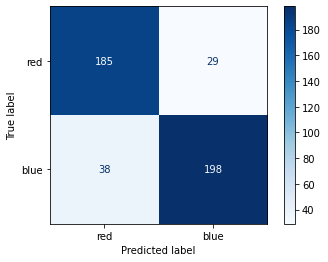

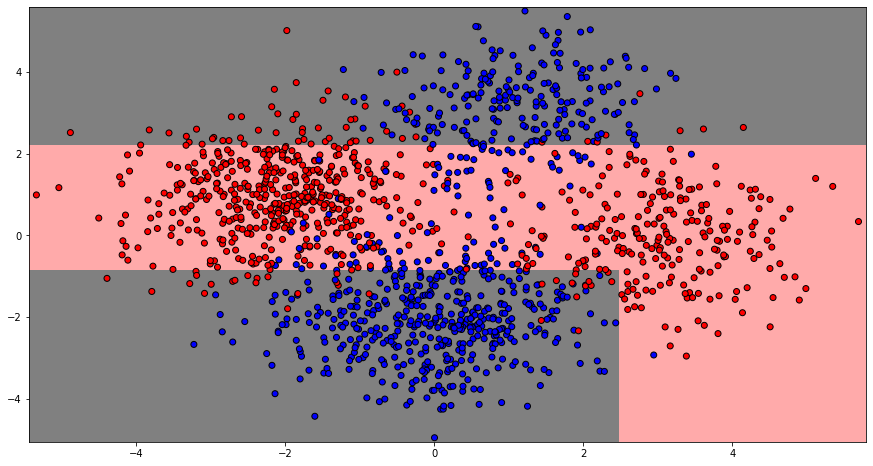

0.8511111111111112

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
plot_confusion(dt, X_test, y_test)
plot_blob_classes(dt, X, y)
dt.score(X_test, y_test)

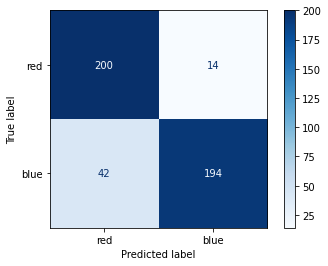

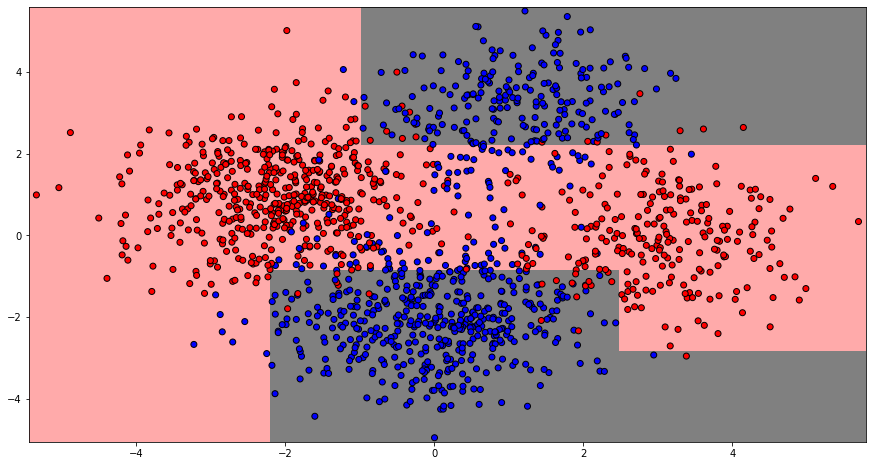

0.8755555555555555

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(X_train, y_train)
plot_confusion(dt3, X_test, y_test)
plot_blob_classes(dt3, X, y)
dt3.score(X_test, y_test)

## K-NN 

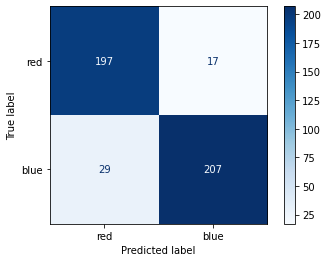

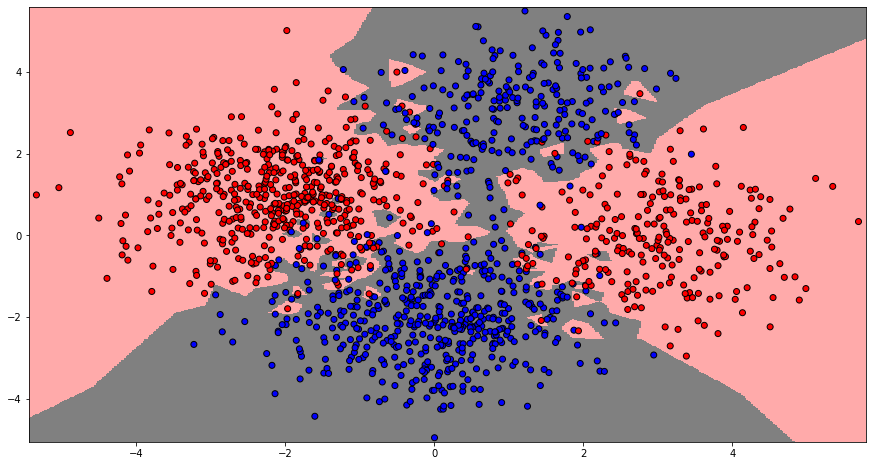

0.8977777777777778

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
plot_confusion(knn, X_test, y_test)
plot_blob_classes(knn, X, y)

knn.score(X_test, y_test)

## Наивный байесовский классификатор

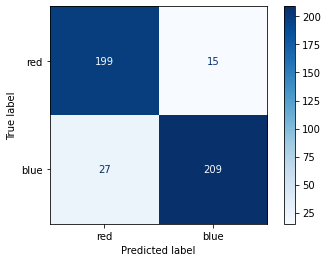

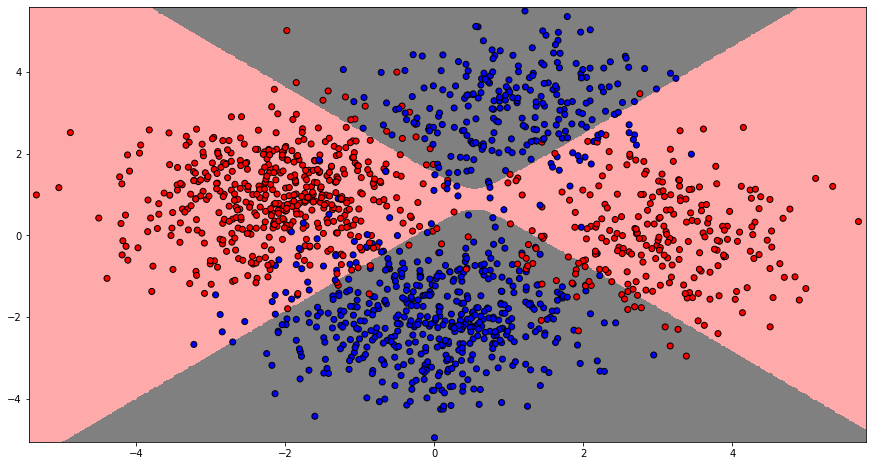

0.9066666666666666

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
plot_confusion(gnb, X_test, y_test)
plot_blob_classes(gnb, X, y)
gnb.score(X_test, y_test)

## Voting classifier

In [ ]:
classifiers = [('lr', lr), ('dt2', dt), ('dt3', dt3), ('knn', knn), ('gnb', gnb)]
classifiers

[('lr', LogisticRegression()),
 ('dt2', DecisionTreeClassifier(max_depth=2)),
 ('dt3', DecisionTreeClassifier(max_depth=3)),
 ('knn', KNeighborsClassifier(n_neighbors=1)),
 ('gnb', GaussianNB())]

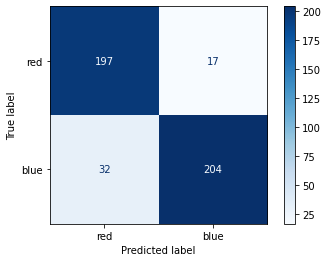

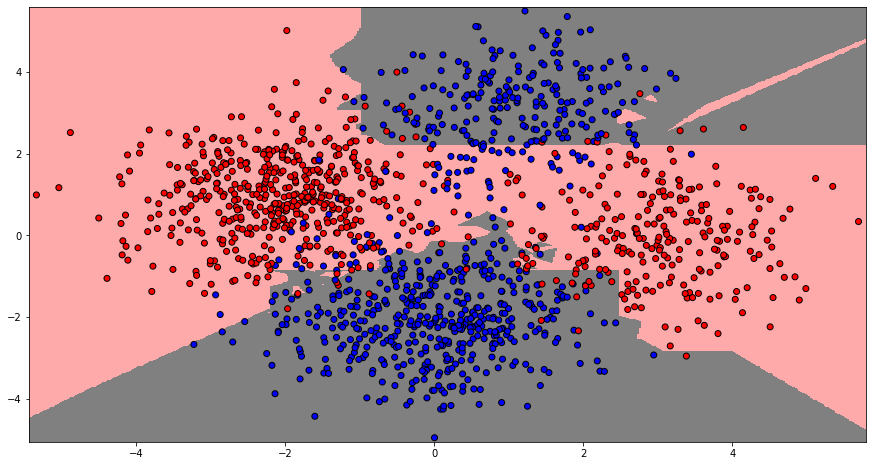

0.8911111111111111

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers, voting='hard')
vc.fit(X_train, y_train)
plot_confusion(vc, X_test, y_test)
plot_blob_classes(vc, X, y)
vc.score(X_test, y_test)

In [ ]:
params = {'lr__C' : [0.5, 1, 1.5], 
          'lr__class_weight': [None,'balanced'],
          'dt2__max_depth' : np.arange(1, 6),
          'dt3__max_depth' : np.arange(1, 6),
          'knn__n_neighbors' : np.arange(1, 20),
          'voting' : ['hard', 'soft']} 
np.prod([len(v) for k, v in params.items()])

5700

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
optimal = RandomizedSearchCV(estimator=vc, param_distributions=params, n_iter=500, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

CPU times: user 8.19 s, sys: 150 ms, total: 8.34 s
Wall time: 38.1 s


In [ ]:
optimal.best_params_

{'dt2__max_depth': 5,
 'dt3__max_depth': 4,
 'knn__n_neighbors': 10,
 'lr__C': 0.5,
 'lr__class_weight': 'balanced',
 'voting': 'hard'}

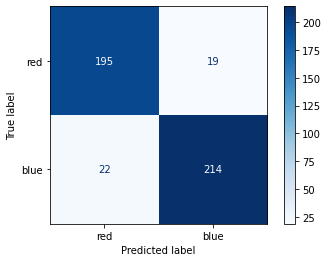

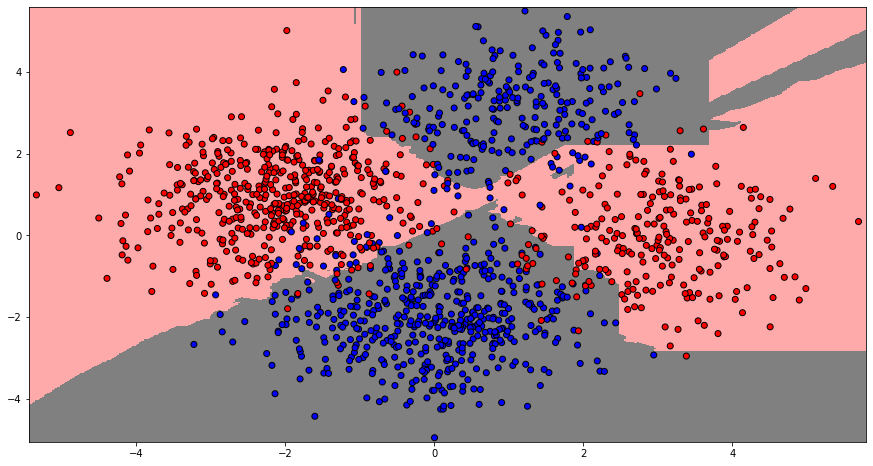

0.9088888888888889

In [ ]:
plot_confusion(optimal, X_test, y_test)
plot_blob_classes(optimal, X, y)
optimal.score(X_test, y_test)

# Случайный лес


**Бутстрэп**  
<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Bagging.png width=700/>

</br>

<image src=https://всеответы.рф/wp-content/uploads/2020/03/Random-forest.jpg width=800 />

## Пятна

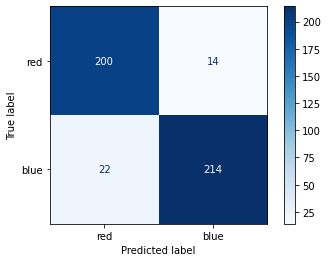

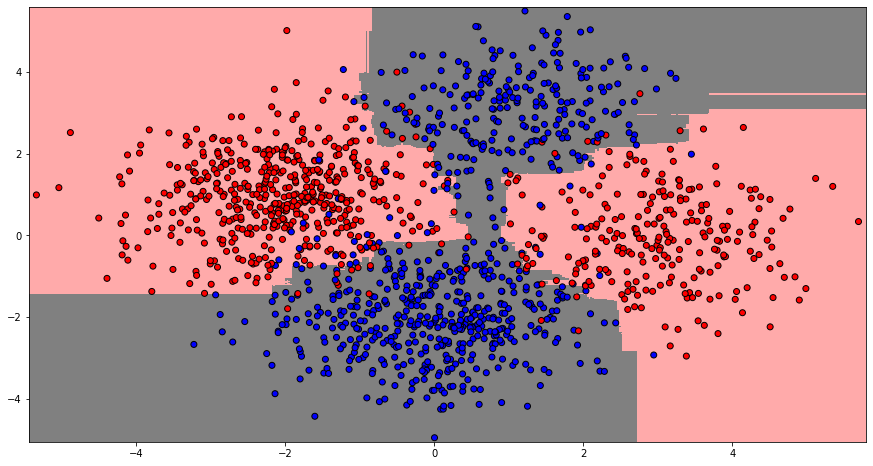

0.92

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=10).fit(X_train, y_train)
plot_confusion(rf, X_test, y_test)
plot_blob_classes(rf, X, y)
rf.score(X_test, y_test)

## Титаник

In [ ]:
!wget -c https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
!ls

--2022-03-12 13:28:27--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K   277KB/s    in 0.2s    

2022-03-12 13:28:28 (277 KB/s) - ‘titanic.csv’ saved [44225/44225]

sample_data  titanic.csv


In [ ]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
yt = df.Survived.values
Xt = df.drop(['Name', 'Survived'], axis=1)
Xt.sample(5)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
378,1,female,42.0,0,0,227.525
3,1,female,35.0,1,0,53.100
362,3,male,27.0,1,0,15.500
346,3,male,3.0,1,1,15.900
86,3,male,20.0,0,0,8.050


In [ ]:
Xt['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
categories = {'female' : 1, 'male' : 0}
Xt['Sex'] = Xt['Sex'].map(categories)
Xt.sample(5)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
87,1,1,23.0,3,2,263.0000
546,2,0,8.0,1,1,36.7500
490,1,0,71.0,0,0,49.5042
197,3,1,21.0,0,0,7.7500
573,2,1,34.0,0,0,13.0000


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.25)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(Xt_train, yt_train)

CPU times: user 216 ms, sys: 1.99 ms, total: 218 ms
Wall time: 218 ms


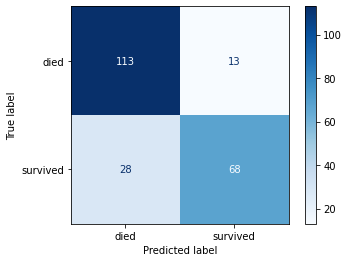

In [ ]:
plot_confusion(rf, Xt_test, yt_test, class_names=['died', 'survived'])

In [ ]:
rf.score(Xt_test, yt_test)

0.8153153153153153

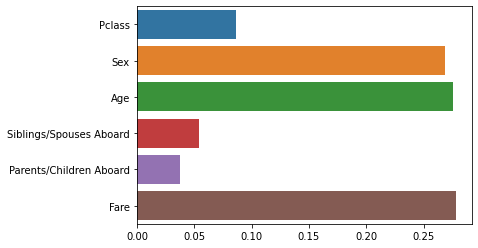

In [ ]:
sns.barplot(x=rf.feature_importances_, y=Xt_train.columns)

#Boosting
<image src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg" alt="boosting diagram" width=800/>

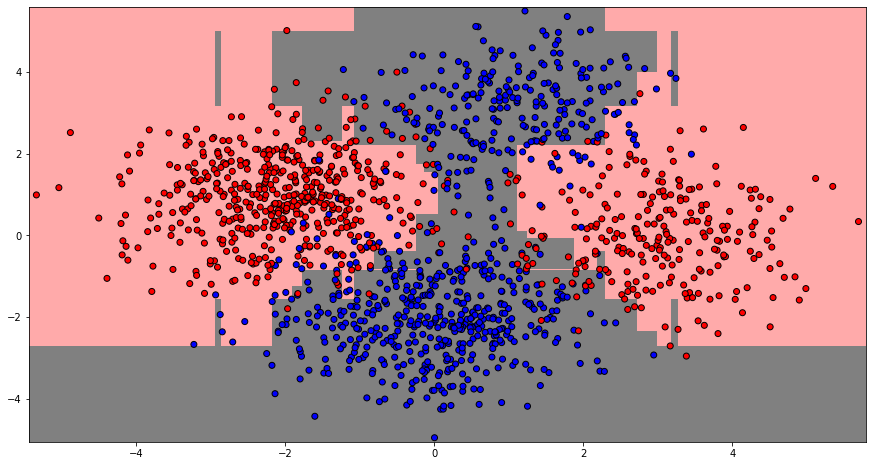

0.9

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier().fit(X_train, y_train)
plot_blob_classes(ab, X, y)
ab.score(X_test, y_test)

0.7972972972972973

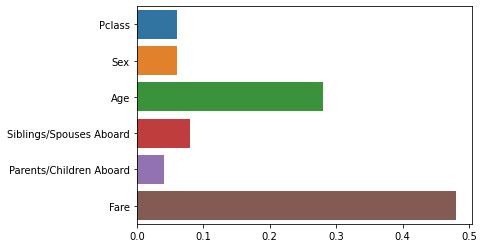

In [ ]:
ab = AdaBoostClassifier().fit(Xt_train, yt_train)
sns.barplot(x=ab.feature_importances_, y=Xt_train.columns)
ab.score(Xt_test, yt_test)

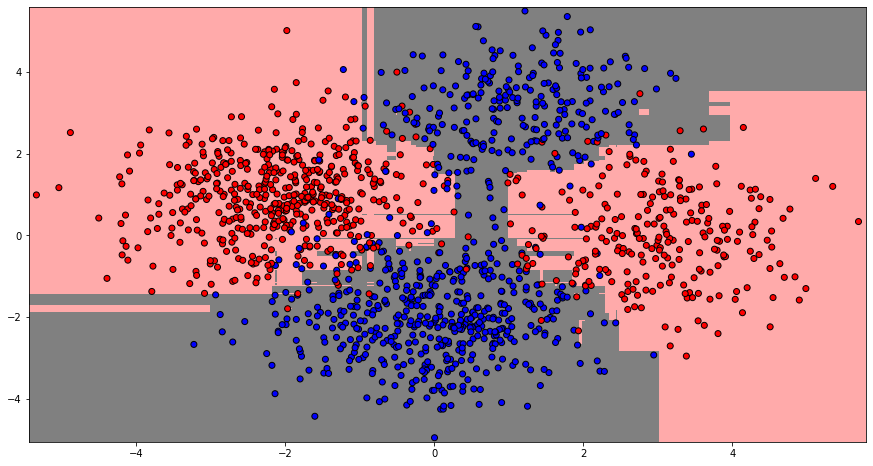

0.9133333333333333

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier().fit(X_train, y_train)
plot_blob_classes(gb, X, y)
gb.score(X_test, y_test)

0.8063063063063063

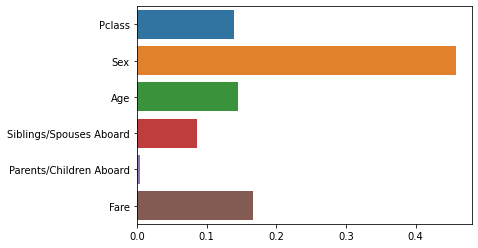

In [ ]:
gb = GradientBoostingClassifier().fit(Xt_train, yt_train)
sns.barplot(x=gb.feature_importances_, y=Xt_train.columns)
gb.score(Xt_test, yt_test)

# Перцептрон

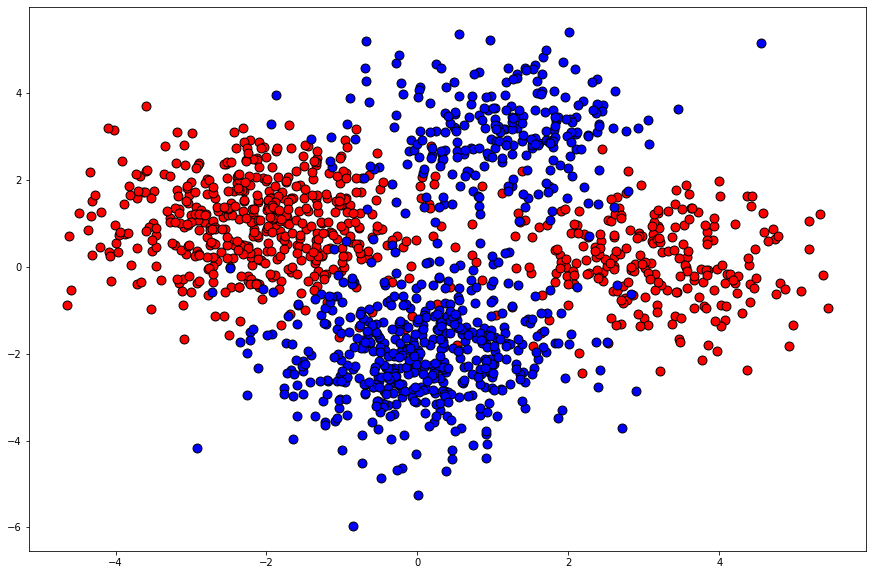

((1200, 2), (1200,), (300, 2), (300,))

In [ ]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=1000, centers=[[-2, 1], [0, -2]], cluster_std=1)
X2, y2 = make_blobs(n_samples=500, centers=[[3, 0], [1, 3]], cluster_std=1)
X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])
plot_blobs(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Keras

[Keras](https://keras.io/) — библиотека, предоставляющая высокоуровневые cтроительные блоки для конструирования моделей глубокого обучения.  

|![Keras](https://www.digikey.com/maker-media/6c3d4f5f-98e0-4104-ad8c-fb0b47000109 "Title")|
|:-------------------------------:|
| Source: https://www.digikey.com/maker-media/6c3d4f5f-98e0-4104-ad8c-fb0b47000109 |

### Определение модели

Модель можно определить двумя способами:   
1. с использованием класса Sequential (только для линейного стека слоев) 
2. с помощью функционального API (для ориентированного ациклического графа слоев, позволяющего конструировать произвольные архитектуры). Функциональный API позволяет манипулировать данными в тензорах, которые обрабатывает модель, и применять слои к этим тензорам, как если бы они были функциями.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(4, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# input_tensor = Input(shape=(2,))
# d1 = Dense(4, activation='elu')(input_tensor)
# d2 = Dense(4, activation='elu')(d1)
# output_tensor = Dense(1, activation='sigmoid')(d2)

# model = Model(inputs=input_tensor, outputs=output_tensor)
# model.summary()

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

### Обучение модели

Процесс обучения состоит в передаче массивов Numpy с входными данными (и соответствующими целевыми данными) в метод fit()

Сеть перебирает обучающие данные пакетами по 32 образца. Для каждого пакета сеть вычисляет градиенты весов с учетом потерь в пакете и изменяет значения весов в соответствующем направлении.

Можно разделить полный датасет из 1200 объектов на батчи размером 400 объектов. Таким образом, для завершения одной эпохи потребуется 3 итерации.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

results = model.fit(X_train, 
                    y_train,
                    batch_size=1200,
                    epochs=200000,
                    validation_split=0.2,
                    shuffle=True,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             restore_best_weights=True)]
                    )

Epoch 1/200000
1/1 [==============================] - 1s 1s/step - loss: 0.6543 - binary_accuracy: 0.5927 - val_loss: 0.6409 - val_binary_accuracy: 0.5917
Epoch 2/200000
1/1 [==============================] - 0s 31ms/step - loss: 0.6530 - binary_accuracy: 0.5938 - val_loss: 0.6396 - val_binary_accuracy: 0.5917
Epoch 3/200000
1/1 [==============================] - 0s 33ms/step - loss: 0.6518 - binary_accuracy: 0.5938 - val_loss: 0.6384 - val_binary_accuracy: 0.5958
Epoch 4/200000
1/1 [==============================] - 0s 34ms/step - loss: 0.6505 - binary_accuracy: 0.5958 - val_loss: 0.6372 - val_binary_accuracy: 0.5958
Epoch 5/200000
1/1 [==============================] - 0s 38ms/step - loss: 0.6493 - binary_accuracy: 0.5990 - val_loss: 0.6360 - val_binary_accuracy: 0.5958
Epoch 6/200000
1/1 [==============================] - 0s 37ms/step - loss: 0.6481 - binary_accuracy: 0.5990 - val_loss: 0.6348 - val_binary_accuracy: 0.5958
Epoch 7/200000
1/1 [==============================] - 0s 38m

### Объект history

Вызов `model.fit()` возвращает объект History. Этот объект имеет поле *history* - словарь со значениями функции потерь и метрики 

In [ ]:
results

In [ ]:
results.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
hist = pd.DataFrame(results.history)
hist

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.654340,0.592708,0.640930,0.591667
1,0.653044,0.593750,0.639649,0.591667
2,0.651771,0.593750,0.638394,0.595833
3,0.650522,0.595833,0.637164,0.595833
4,0.649298,0.598958,0.635959,0.595833
...,...,...,...,...
1630,0.171806,0.933333,0.160574,0.929167
1631,0.171799,0.933333,0.160573,0.929167
1632,0.171791,0.933333,0.160574,0.929167
1633,0.171784,0.933333,0.160574,0.929167


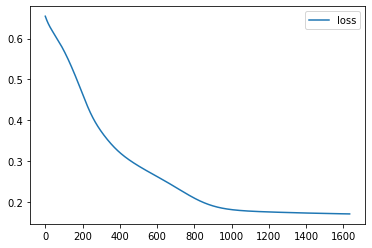

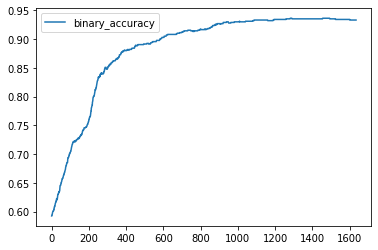

In [ ]:
hist[['loss']].plot()
hist[['binary_accuracy']].plot()

In [ ]:
loss, acc = model.evaluate(X_test, y_test, batch_size=300)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 0s 173ms/step - loss: 0.1495 - binary_accuracy: 0.9400
Test loss: 0.14948630332946777
Test accuracy: 0.9399999976158142


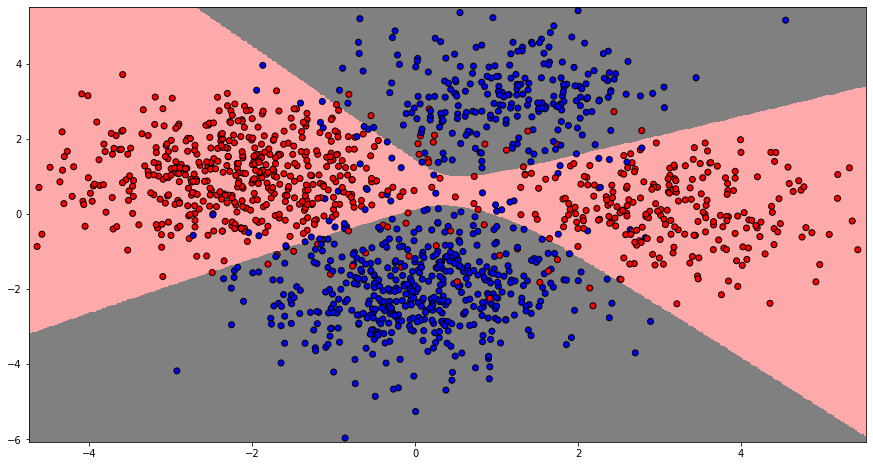

In [ ]:
plot_blob_classes(model, X, y)

# Задание

1. Применить один из бустовых классификаторов к своей модели, визуализировать оценку важности признаков